**CraxLab.net | CxL | Department of Civil Engineering | Sakarya University**

---

## Example: Material model of reinforcing bars according to TSCB-2019
![](./figures_files/Ex_Reinf_Steel_Model2.png)
![](./figures_files/Ex_Reinf_Steel_Model1.png)

![](./Figures/Ex/MateialModels/Rebar/Ex_Reinf_Steel_Model3.png)

**Donatı özellikleri ve donatının kullanıcı tarafından girilmesi:**

In [1]:
rebars = {
    "S220":{"fsy":220, "esy":0.0011, "esh":0.011, "esu":0.12, "fsu/fsy":1.20},
    "S420":{"fsy":420, "esy":0.0021, "esh":0.008, "esu":0.08, "fsu/fsy":1.15},
   "B420C":{"fsy":420, "esy":0.0021, "esh":0.008, "esu":0.08, "fsu/fsy":1.15},
   "B500C":{"fsy":500, "esy":0.0025, "esh":0.008, "esu":0.08, "fsu/fsy":1.15},
}

RType = input("Enter type of rebar:")
fsy = rebars[RType]["fsy"]
fsu = rebars[RType]["fsu/fsy"] * fsy
esy = rebars[RType]["esy"]
esh = rebars[RType]["esh"]
esu = rebars[RType]["esu"]
Es = 200000    # [MPa]

Enter type of rebar:S420


**Şekildeğiştirme değerlerinin oluşturulması:**

In [2]:
# Şekildeğiştirme eksenini kendimiz oluşturuyoruz.
import numpy as np
es = np.arange(0, esu+0.001, 0.001)

**Gerilme değerlerinin hesaplanması:**

Not: Aşağıdaki 2 yöntemde aynı sonucu vermektedir. İstenilen birisi kullanılabilir.

In [3]:
# 1) fonksiyon kullanmadan
fs = []
for esi in es:
    if esi <= esy:
        fsi = Es*esi
    elif esy < esi <= esh:
        fsi = fsy
    else: fsi = fsu - (fsu-fsy) * (esu-esi)**2 / (esu-esh)**2
    fs.append(fsi)

In [4]:
# 2) fonksiyon kullanarak
def rebar(es, esy, esh, fsy, fsu, Es):
    if es <= esy:
        fs = Es*es
    elif esy < es <= esh:
        fs = fsy
    else: fs = fsu - (fsu-fsy) * (esu-es)**2 / (esu-esh)**2
    return fs

fs = []
for esi in es:
    fsi = rebar(esi, esy, esh, fsy, fsu, Es)
    fs.append(fsi)

**Grafiğin çizdirilmesi:**

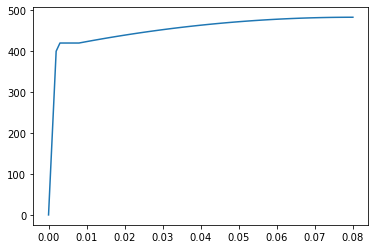

In [5]:
import matplotlib.pyplot as plt
plt.plot(es,fs)      # Basit tek çizim